In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path = 'https://raw.githubusercontent.com/TripathiAshutosh/MachineLearning/master/Walmart_Weekly_Sales_Prediction/Walmart%20Data%20Set%20Final%20Version%202.1.csv'

df = pd.read_csv(path)

In [3]:
df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Weekly_Sales
0,Store1,Dept1,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,24924.50
1,Store1,Dept2,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,50605.27
2,Store1,Dept3,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,13740.12
3,Store1,Dept4,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,39954.04
4,Store1,Dept5,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,32229.38


In [4]:
missing_data = df.isnull()
missing_data.head(5)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Weekly_Sales
0,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False
2,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False


In [5]:
df.dtypes

Store            object
Dept             object
Date             object
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
Weekly_Sales    float64
dtype: object

In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Store
False    421570
Name: Store, dtype: int64

Dept
False    421570
Name: Dept, dtype: int64

Date
False    421570
Name: Date, dtype: int64

IsHoliday
False    421570
Name: IsHoliday, dtype: int64

Temperature
False    421570
Name: Temperature, dtype: int64

Fuel_Price
False    421570
Name: Fuel_Price, dtype: int64

MarkDown1
True     270889
False    150681
Name: MarkDown1, dtype: int64

MarkDown2
True     310322
False    111248
Name: MarkDown2, dtype: int64

MarkDown3
True     284479
False    137091
Name: MarkDown3, dtype: int64

MarkDown4
True     286603
False    134967
Name: MarkDown4, dtype: int64

MarkDown5
True     270138
False    151432
Name: MarkDown5, dtype: int64

CPI
False    421570
Name: CPI, dtype: int64

Unemployment
False    421570
Name: Unemployment, dtype: int64

Type
False    421570
Name: Type, dtype: int64

Size
False    421570
Name: Size, dtype: int64

Weekly_Sales
False    421570
Name: Weekly_Sales, dtype: int64



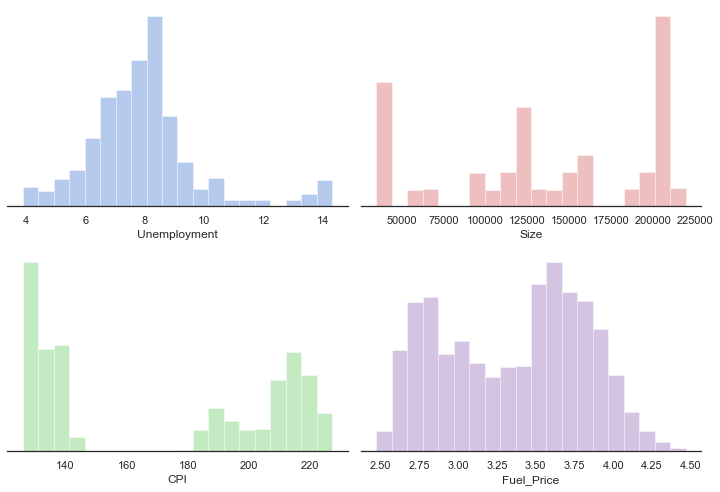

In [7]:
sns.set(style="white", palette="muted", color_codes=True)


# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(10, 7))
sns.despine(left=True)

# Generate a random univariate dataset


# Plot a simple histogram with binsize determined automatically
sns.distplot(df["Unemployment"], bins=20,kde=False, ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(df['Size'], bins=20,kde=False, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(df['CPI']  , bins=20, kde=False, color="g", ax=axes[1, 0])

# Plot a histogram and kernel density estimate
sns.distplot(df['Fuel_Price'] , bins=20, kde=False, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

In [8]:
df.corr()

,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Weekly_Sales
IsHoliday,1.000000,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460,0.000593,0.012774
Temperature,-0.155949,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730,-0.058313,-0.002312
Fuel_Price,-0.078281,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853,0.003361,-0.000120
MarkDown1,-0.035586,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285,0.345673,0.085251
MarkDown2,0.334818,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940,0.108827,0.024130
MarkDown3,0.427960,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818,0.048913,0.060385
MarkDown4,-0.000562,-0.063947,-0.044986,0.819238,-0.007768,-0.071095,1.000000,0.107792,-0.049628,0.024963,0.168196,0.045414
MarkDown5,-0.053719,-0.017544,-0.128065,0.160257,-0.007440,-0.026467,0.107792,1.000000,0.060630,-0.003843,0.304575,0.090362
CPI,-0.001944,0.182112,-0.164210,-0.055558,-0.039534,-0.023590,-0.049628,0.060630,1.000000,-0.299953,-0.003314,-0.020921
Unemployment,0.010460,0.096730,-0.033853,0.050285,0.020940,0.012818,0.024963,-0.003843,-0.299953,1.000000,-0.068238,-0.025864


In [9]:
df.describe()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Weekly_Sales
count,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,15981.258123
std,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,22711.183519
min,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,-4988.940000
25%,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,2079.650000
50%,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,7612.030000
75%,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,20205.852500
max,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,693099.360000


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lb_enc = LabelEncoder()
df['Dept_code'] = lb_enc.fit_transform(df['Dept']) 
df['Store_code'] = lb_enc.fit_transform(df['Store'])
df['Type_code'] = lb_enc.fit_transform(df['Type'])

df['Dept_code'].head()

0     0
1    10
2    21
3    32
4    43
Name: Dept_code, dtype: int32

In [12]:
df.drop(['Store','Dept','Type'],axis = 1, inplace = True) 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Date            421570 non-null object
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Size            421570 non-null int64
Weekly_Sales    421570 non-null float64
Dept_code       421570 non-null int32
Store_code      421570 non-null int32
Type_code       421570 non-null int32
dtypes: bool(1), float64(10), int32(3), int64(1), object(1)
memory usage: 43.8+ MB


In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
# Extract date features
df['Date_dayofweek'] = df['Date'].dt.dayofweek
df['Date_month'] = df['Date'].dt.month 
df['Date_year'] = df['Date'].dt.year
df['Date_day'] = df['Date'].dt.day

In [16]:
df.head()

,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Weekly_Sales,Dept_code,Store_code,Type_code,Date_dayofweek,Date_month,Date_year,Date_day
0,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315,24924.50,0,0,0,4,2,2010,5
1,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315,50605.27,10,0,0,4,2,2010,5
2,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315,13740.12,21,0,0,4,2,2010,5
3,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315,39954.04,32,0,0,4,2,2010,5
4,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315,32229.38,43,0,0,4,2,2010,5


In [17]:
df.isnull().sum()

Date                   0
IsHoliday              0
Temperature            0
Fuel_Price             0
MarkDown1         270889
MarkDown2         310322
MarkDown3         284479
MarkDown4         286603
MarkDown5         270138
CPI                    0
Unemployment           0
Size                   0
Weekly_Sales           0
Dept_code              0
Store_code             0
Type_code              0
Date_dayofweek         0
Date_month             0
Date_year              0
Date_day               0
dtype: int64

In [18]:
df.fillna(0,inplace = True) 

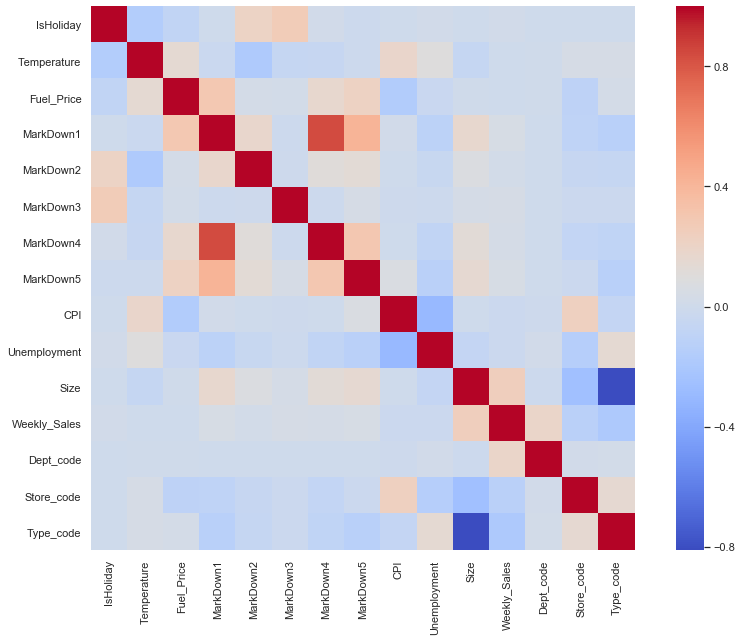

<Figure size 720x504 with 0 Axes>

In [19]:
f, ax = plt.subplots(figsize=(15, 10))
plt.figure(figsize=(10,7))
sns.heatmap(df.drop(['Date_dayofweek','Date_month', 'Date_year', 'Date_day'], axis=1).corr(), cmap='coolwarm', square=True, ax=ax)

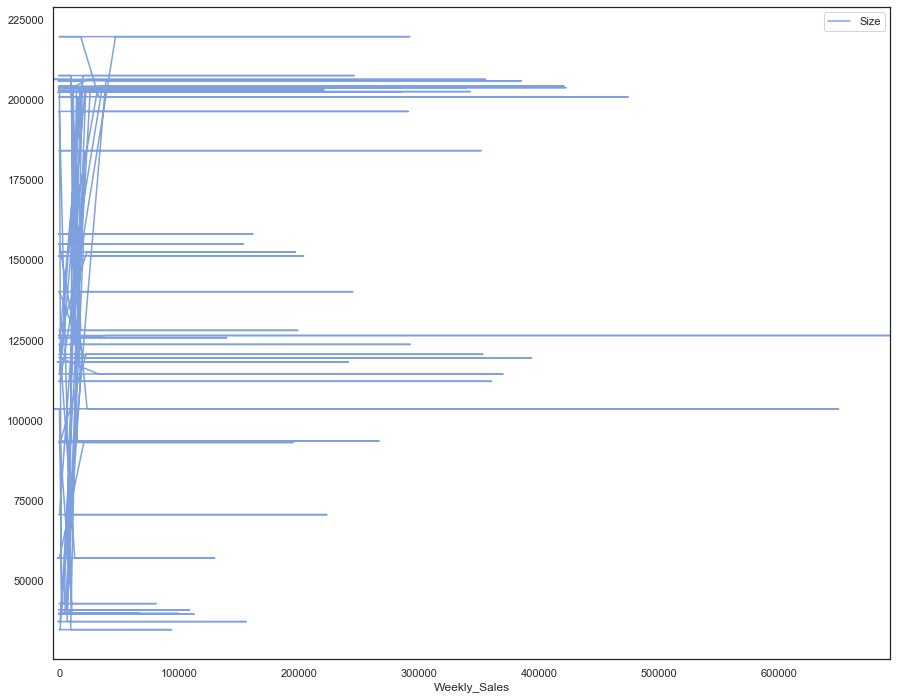

In [20]:
f,ax = plt.subplots(figsize=(15, 12))
df.plot(kind='line', x='Weekly_Sales', y='Size', alpha=0.7, ax=ax)

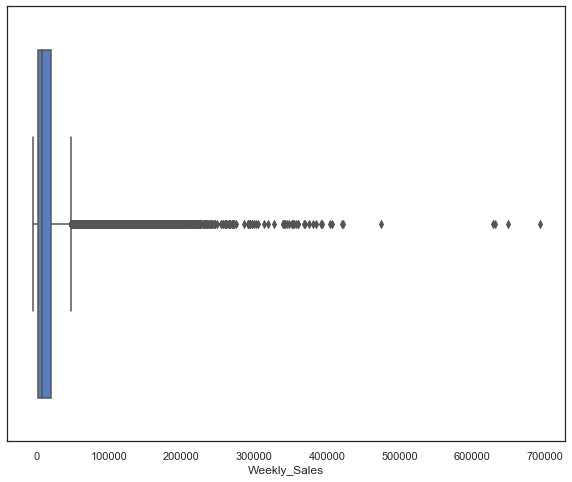

In [21]:
f,ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x=df['Weekly_Sales'],ax=ax)

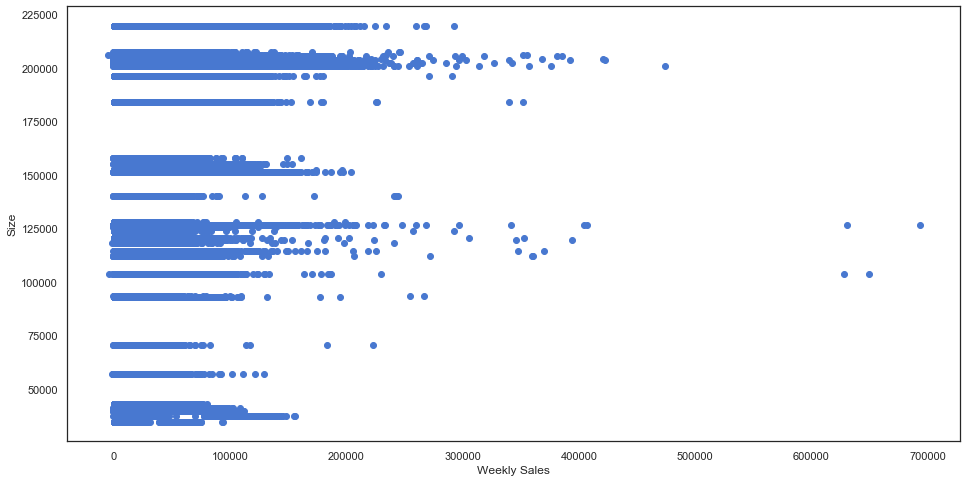

In [22]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Weekly_Sales'], df['Size'])
ax.set_xlabel('Weekly Sales')
ax.set_ylabel('Size')
plt.show()

In [23]:
#### from above box plot and scatter plot, weekly sale greater than 200000 considered as outlier hence setting it to 100000

df.Weekly_Sales=np.where(df.Weekly_Sales>200000, 200000,df.Weekly_Sales)

Text(0.5, 0, 'Weekly Sales')

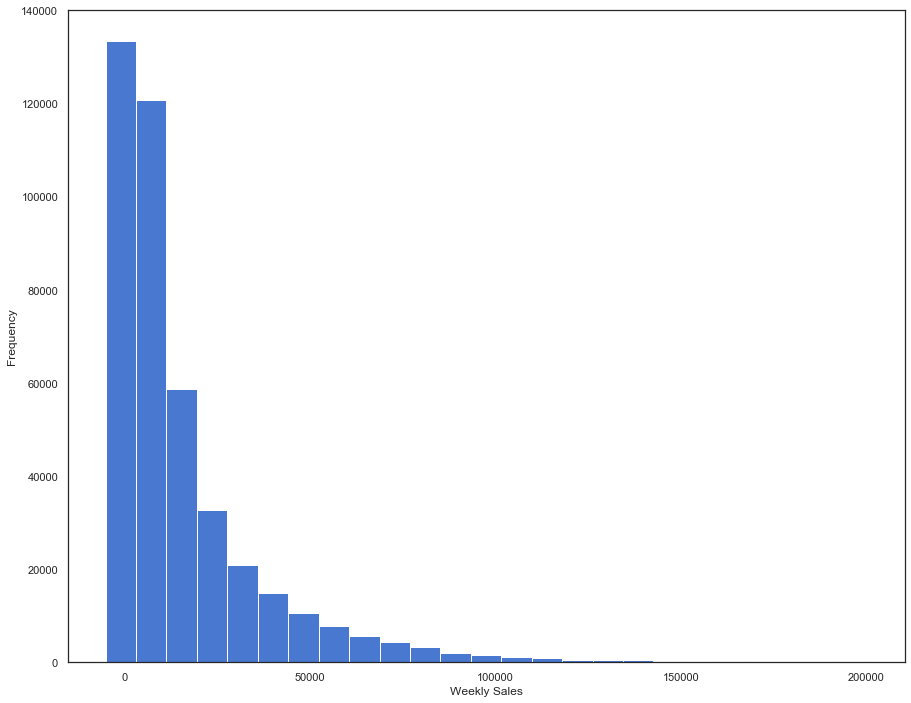

In [24]:
f,ax = plt.subplots(figsize=(15, 12))
df.Weekly_Sales.plot.hist(bins=25,ax=ax)
ax.set_xlabel('Weekly Sales')

In [25]:
# again from above graph we can make all sales greater than 100000 equal to 100000 by treating them as outliers

df.Weekly_Sales=np.where(df.Weekly_Sales>100000, 100000,df.Weekly_Sales)

Text(0.5, 0, 'Weekly Sales')

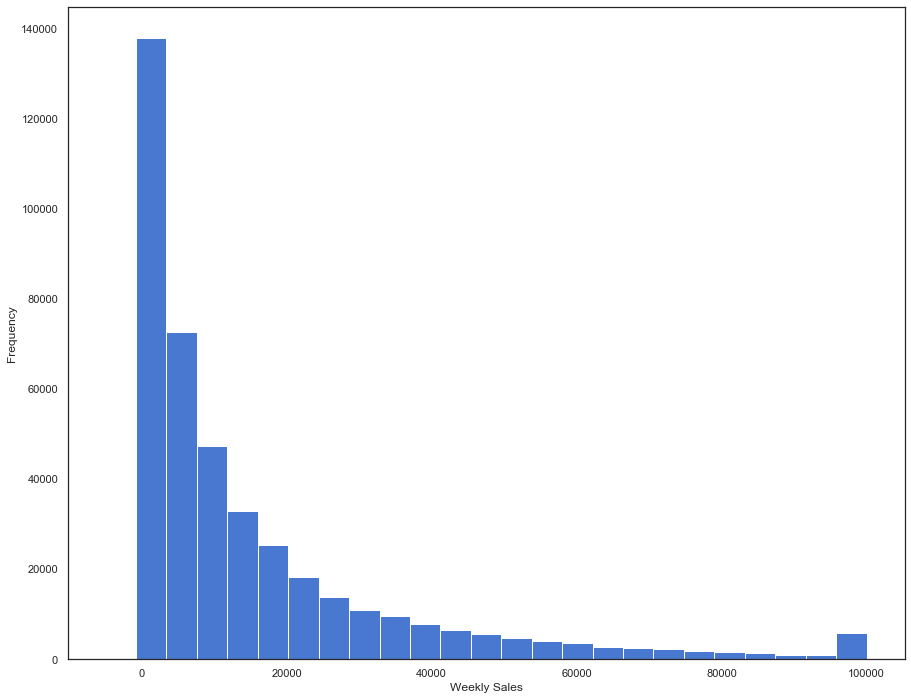

In [26]:
f,ax = plt.subplots(figsize=(15, 12))
df.Weekly_Sales.plot.hist(bins=25,ax=ax)
ax.set_xlabel('Weekly Sales')

In [27]:
from datetime import datetime

In [28]:
df['Super_Bowl'] = np.where((df['Date']==datetime(2010, 2, 7)) | (df['Date']==datetime(2011, 2, 7)) | (df['Date']==datetime(2012, 2, 6)) | (df['Date']==datetime(2013, 2, 4)),1,0)
df['Labour_Day'] = np.where((df['Date']==datetime(2010, 9, 6)) | (df['Date']==datetime(2011, 9, 5)) | (df['Date']==datetime(2012, 9, 3)) | (df['Date']==datetime(2013, 8, 30)),1,0)
df['Thanksgiving'] = np.where((df['Date']==datetime(2010, 11, 25)) | (df['Date']==datetime(2011, 11, 24)) | (df['Date']==datetime(2012, 11, 22)) | (df['Date']==datetime(2013, 11, 28)),1,0)
df['Christmas'] = np.where((df['Date']==datetime(2010, 12, 25)) | (df['Date']==datetime(2011, 12, 25)) | (df['Date']==datetime(2012, 12, 25)) | (df['Date']==datetime(2013, 12, 25)),1,0)

In [29]:
df['IsHoliday']= df['Super_Bowl']|df['Labour_Day']|df['Thanksgiving']|df['Christmas']

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 24 columns):
Date              421570 non-null datetime64[ns]
IsHoliday         421570 non-null int32
Temperature       421570 non-null float64
Fuel_Price        421570 non-null float64
MarkDown1         421570 non-null float64
MarkDown2         421570 non-null float64
MarkDown3         421570 non-null float64
MarkDown4         421570 non-null float64
MarkDown5         421570 non-null float64
CPI               421570 non-null float64
Unemployment      421570 non-null float64
Size              421570 non-null int64
Weekly_Sales      421570 non-null float64
Dept_code         421570 non-null int32
Store_code        421570 non-null int32
Type_code         421570 non-null int32
Date_dayofweek    421570 non-null int64
Date_month        421570 non-null int64
Date_year         421570 non-null int64
Date_day          421570 non-null int64
Super_Bowl        421570 non-null int32
Labour_Day        42

In [31]:
print (df.Christmas.value_counts())
print (df['Super_Bowl'].value_counts())
print (df['Thanksgiving'].value_counts())
print (df['Labour_Day'].value_counts())

0    421570
Name: Christmas, dtype: int64
0    421570
Name: Super_Bowl, dtype: int64
0    421570
Name: Thanksgiving, dtype: int64
0    421570
Name: Labour_Day, dtype: int64


In [32]:
dp=['Super_Bowl','Labour_Day','Thanksgiving','Christmas']
df.drop(dp,axis=1,inplace=True)

In [33]:
df.drop(['Date'], axis=1,inplace = True)

In [34]:
X=df.drop(['Weekly_Sales'], axis=1)

y=df['Weekly_Sales']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_linear=mlr.predict(X_test)
acc_linear= mlr.score(X_train, y_train)
print (acc_linear)

0.10824082523023405


In [39]:
mlr.score(X_train, y_train) * 100

10.824082523023405

In [40]:
mlr.score(X_train, y_train) #r square

0.10824082523023405

In [41]:
mlr.score(X_test, y_test)

0.11071460549494559

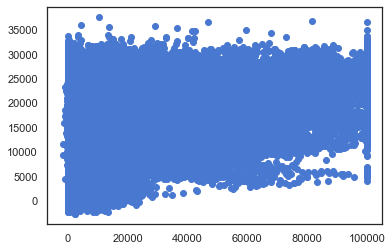

In [42]:
plt.scatter(y_test,y_pred_linear)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
mse = mean_squared_error(y_test, y_pred_linear)
r_squared = r2_score(y_test, y_pred_linear)
from math import sqrt
rmse = sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 372410168.15023386
Root_Mean_Squared_Error : 19297.93170653876
r_square_value : 0.1107146054949456


In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rf = RandomForestRegressor(n_estimators=100)

In [46]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [47]:
y_pred_rf=rf.predict(X_test)
acc_rf = rf.score(X_train, y_train)

In [48]:
print (acc_rf*100)

99.70411536234037


In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
dt = DecisionTreeRegressor()
dt . fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt= dt.score(X_train, y_train)

In [51]:
print(acc_dt*100)

100.0


## Model Selection

In [52]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest','Decision Tree'],
    
    'Score': [acc_linear*100, acc_rf*100,acc_dt*100]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,100.000000
1,Random Forest,99.704115
0,Linear Regression,10.824083


In [53]:
# Prediction value using Random Forest model..
prediction_rf = pd.DataFrame({
        "Store_Dept_Date": X_test.Store_code.astype(str)+'_'+X_test.Dept_code.astype(str)+'_' + X_test.Date_year.astype(str)
    +'-' + X_test.Date_month.astype(str) + '-' +  X_test.Date_day.astype(str),
        "Weekly_Sales": y_pred_rf
    })
# print the result in csv file
prediction_rf.to_csv('weekly_sales predicted using rf.csv', index=False)